In [1]:
import sys
import os
import numpy as np
import pandas as pd
import scprep
import phate
import multiscale_phate
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'multiscale_phate'

In [85]:
genes = np.load('EMD_perturb_lab.npy')
D = np.load('EMD_perturb_dist.npy')

In [86]:
print(D.shape, '\n', genes)

(40, 40) 
 ['BACH2' 'BATF' 'BCL6' 'CXCL13' 'CXCR5' 'DNMT1' 'DNMT3A' 'DNMT3B' 'DUSP4'
 'EOMES' 'EZH2' 'ID2' 'ID3' 'IKZF1' 'IKZF2' 'IKZF3' 'IL21R' 'IRF4' 'KLF2'
 'LEF1' 'NR4A1' 'NR4A2' 'NR4A3' 'PRDM1' 'SH2D1A' 'SLAMF6' 'STAT1' 'STAT3'
 'STAT5A' 'STAT5B' 'TBX21' 'TCF7' 'TET1' 'TET2' 'TET3' 'TOX' 'TOX2'
 'UNPERT' 'XCL1' 'ZEB2']


In [87]:
mp_op = multiscale_phate.Multiscale_PHATE(random_state = 2)
mp_op.fit(D)

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculating diffusion potential...
  Calculated diffusion potential in 0.01 seconds.
  Setting epsilon to 0.173
  Setting merge threshold to 0.0012
  Calculating condensation...
  Calculated condensation in 0.37 seconds.
Calculated Multiscale PHATE tree in 0.39 seconds.
Computing gradient...
Identifying salient levels of resolution...


[0,
 6,
 19,
 24,
 28,
 32,
 35,
 43,
 50,
 58,
 68,
 71,
 75,
 79,
 86,
 94,
 105,
 110,
 119,
 139,
 143,
 149,
 173,
 193]

Calculating base visualization...
Calculating tree...
24 [  0   6  19  24  28  32  35  43  50  58  68  71  75  79  86  94 105 110
 119 139 143 149 173 193]


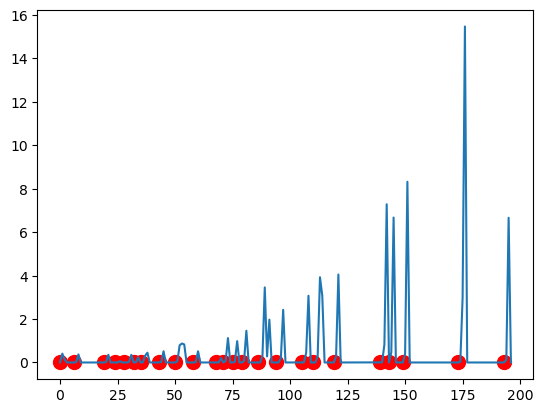

In [88]:
tree = mp_op.build_tree()
levels = mp_op.levels

print(len(np.unique(levels)), np.unique(levels))

ax = plt.plot(mp_op.gradient)
ax = plt.scatter(levels, mp_op.gradient[levels], c = 'r', s=100)
plt.show()

In [89]:
vis = 1
clust = 21

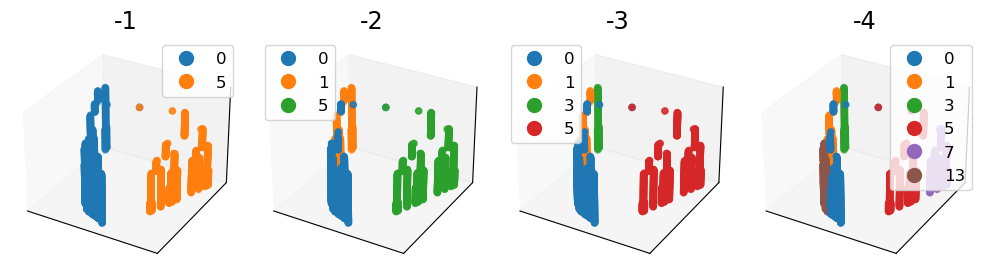

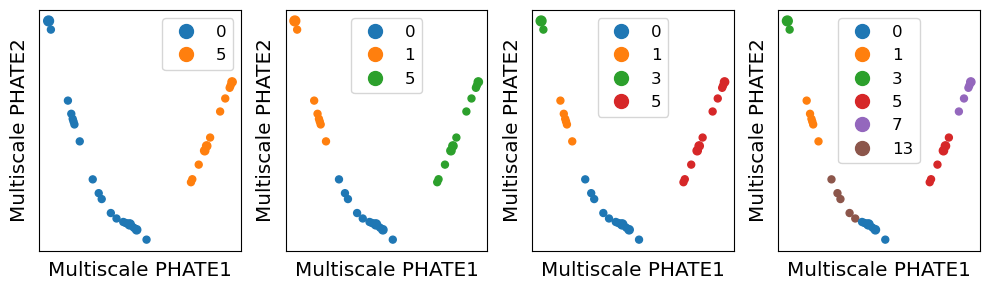

In [90]:
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(1,4,figsize=(10,10),subplot_kw=dict(projection='3d'))
for i, ax in enumerate(axes.flatten()):
    clust = -(i+1)
    tree_clusters = mp_op.get_tree_clusters(levels[clust])
    scprep.plot.scatter3d(tree, c = tree_clusters, s= 20, 
                      fontsize=10, ticks=False, ax=ax, title = f'{-(i+1)}')
fig.tight_layout()

fig, axes = plt.subplots(1,4,figsize=(10,3))
for i, ax in enumerate(axes.flatten()):
    clust = -(i+1)
    coarse_embedding, coarse_clusters, coarse_sizes = mp_op.transform(visualization_level = levels[vis],
                                                                  cluster_level = levels[clust])
    scprep.plot.scatter2d(coarse_embedding, s = np.sqrt(coarse_sizes)*25, c = coarse_clusters,
                          fontsize=10, ticks=False,label_prefix="Multiscale PHATE", ax=ax)
fig.tight_layout()

In [96]:
vis = 1
clust = 20

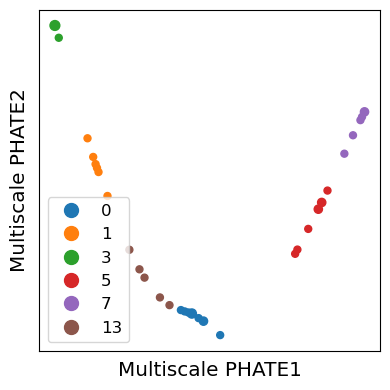

In [97]:
tree_clusters = mp_op.get_tree_clusters(levels[clust])
coarse_embedding, coarse_clusters, coarse_sizes = mp_op.transform(visualization_level = levels[vis],
                                                                  cluster_level = levels[clust])

scprep.plot.scatter2d(coarse_embedding, s = np.sqrt(coarse_sizes)*25, c = coarse_clusters,
                          fontsize=10, ticks=False,label_prefix="Multiscale PHATE",figsize = (4,4))
plt.show()

In [98]:
clusters = mp_op.NxTs[levels[clust]]
#pd.DataFrame({'genes':genes,'cluster_id':clusters})
res = {c:list(genes[clusters == c]) for c in np.unique(clusters)}

In [102]:
for key, val in list(res.items()):
    print(key, val)

0 ['BACH2', 'DUSP4', 'EOMES', 'ID3', 'IKZF2', 'KLF2', 'PRDM1', 'STAT3', 'TOX', 'UNPERT']
1 ['BATF', 'BCL6', 'CXCR5', 'NR4A3', 'SH2D1A', 'TET1']
3 ['CXCL13', 'NR4A1', 'SLAMF6', 'TET2', 'TOX2']
5 ['DNMT1', 'DNMT3A', 'EZH2', 'ID2', 'IL21R', 'IRF4', 'TBX21', 'TET3']
7 ['DNMT3B', 'STAT1', 'STAT5A', 'STAT5B', 'TCF7', 'ZEB2']
13 ['IKZF1', 'IKZF3', 'LEF1', 'NR4A2', 'XCL1']


In [95]:
#0  (should prob zoom in on this one)
# probably combo of precursor/proliferating/effector

#13
# precursors (ikaros, nr4a2, lef1)

#1 maybe moving towards exhausted? see what Nik says, I know more about what these do in CD4 than CD8s
#Tfh-like (BCL6, CXCR5)?

#3 probably the most 'exhausted'
# NR4A1 and TOX work together to drive exhaustion- 

## 5/7 look like like a combination of 
##type 1 interferon (IRF4, STAT1)
##effector (TBX21, TCF7, STAT5A/B)
## lots of epigenetic modifiers here


